import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix, balanced_accuracy_score, f1_score
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

load the data

In [3]:
data = pd.read_csv('startup_data.csv')

preprocessing

In [4]:
data.shape

(923, 49)

In [6]:
data_to_test = data.tail(100)
data_to_test.to_csv(r"C:\Users\CChelmi\BBDA_project3_supervised_ML\cleaning\100rowstest_data_for_test", index = False) # save the 100 rows to test the model later
data_to_test.index
data.drop(data_to_test.index).head()
data = data.drop(data_to_test.index)
data.shape

(723, 49)

In [7]:
# Transforming the target column to boolian

data.replace(to_replace = ['acquired','closed'],value = [1,0], inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                723 non-null    int64  
 1   state_code                723 non-null    object 
 2   latitude                  723 non-null    float64
 3   longitude                 723 non-null    float64
 4   zip_code                  723 non-null    object 
 5   id                        723 non-null    object 
 6   city                      723 non-null    object 
 7   Unnamed: 6                338 non-null    object 
 8   name                      723 non-null    object 
 9   labels                    723 non-null    int64  
 10  founded_at                723 non-null    object 
 11  closed_at                 272 non-null    object 
 12  first_funding_at          723 non-null    object 
 13  last_funding_at           723 non-null    object 
 14  age_first_

In [9]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  385
name                          0
labels                        0
founded_at                    0
closed_at                   451
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    123
age_last_milestone_year     123
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [10]:
data.isnull().sum().sum()

1083

In [11]:
# Checking for duplicates: 

data['id'].nunique() # so no duplicates

723

In [12]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,600.000000,600.000000,723.000000,723.000000,7.230000e+02,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,570.842324,38.508529,-102.822586,0.634855,2.242894,3.932313,3.106715,4.822759,7.715076,2.301521,2.711259e+07,1.842324,0.510373,0.114799,0.095436,0.047026,0.230982,0.175657,0.161826,0.088520,0.078838,0.069156,0.053942,0.023513,0.037344,0.002766,0.308437,0.322268,0.250346,0.508990,0.398340,0.232365,0.103734,2.784829,0.810512,0.634855
std,333.797511,3.655019,22.416922,0.481804,2.554301,3.019124,3.017121,3.282817,7.476029,1.381651,2.137282e+08,1.349066,0.500238,0.319000,0.294019,0.211842,0.421753,0.380791,0.368546,0.284246,0.269673,0.253895,0.226059,0.151631,0.189736,0.052559,0.462168,0.467669,0.433512,0.500265,0.489895,0.422633,0.305127,1.772797,0.392167,0.481804
min,1.000000,26.052461,-122.725662,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.200000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,280.500000,37.390729,-122.191547,0.000000,0.583600,1.756150,1.002700,2.476725,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,574.000000,37.779281,-118.244476,1.000000,1.512300,3.498600,2.656200,4.504100,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.400000,1.000000,1.000000
75%,862.500000,40.730646,-77.013601,1.000000,3.508200,5.552050,4.697250,6.810275,10.000000,3.000000,2.450527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,1.000000
max,1153.000000,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.500000,1.000000,1.000000


In [13]:
# Separate object vs numeric columns:

obj_cols = data.select_dtypes(include='object').columns.to_list()
print(obj_cols)
print(len(obj_cols))

['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id']
13


In [15]:

num_cols = data.select_dtypes(exclude='object').columns.to_list()
print(num_cols)
print(len(num_cols))

['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']
36


In [16]:
# Creating a new dataset with the numeric columns so I can create a heatmap to investigate the correlations:

num_df = pd.DataFrame(data[num_cols])
#num_df

<Axes: >

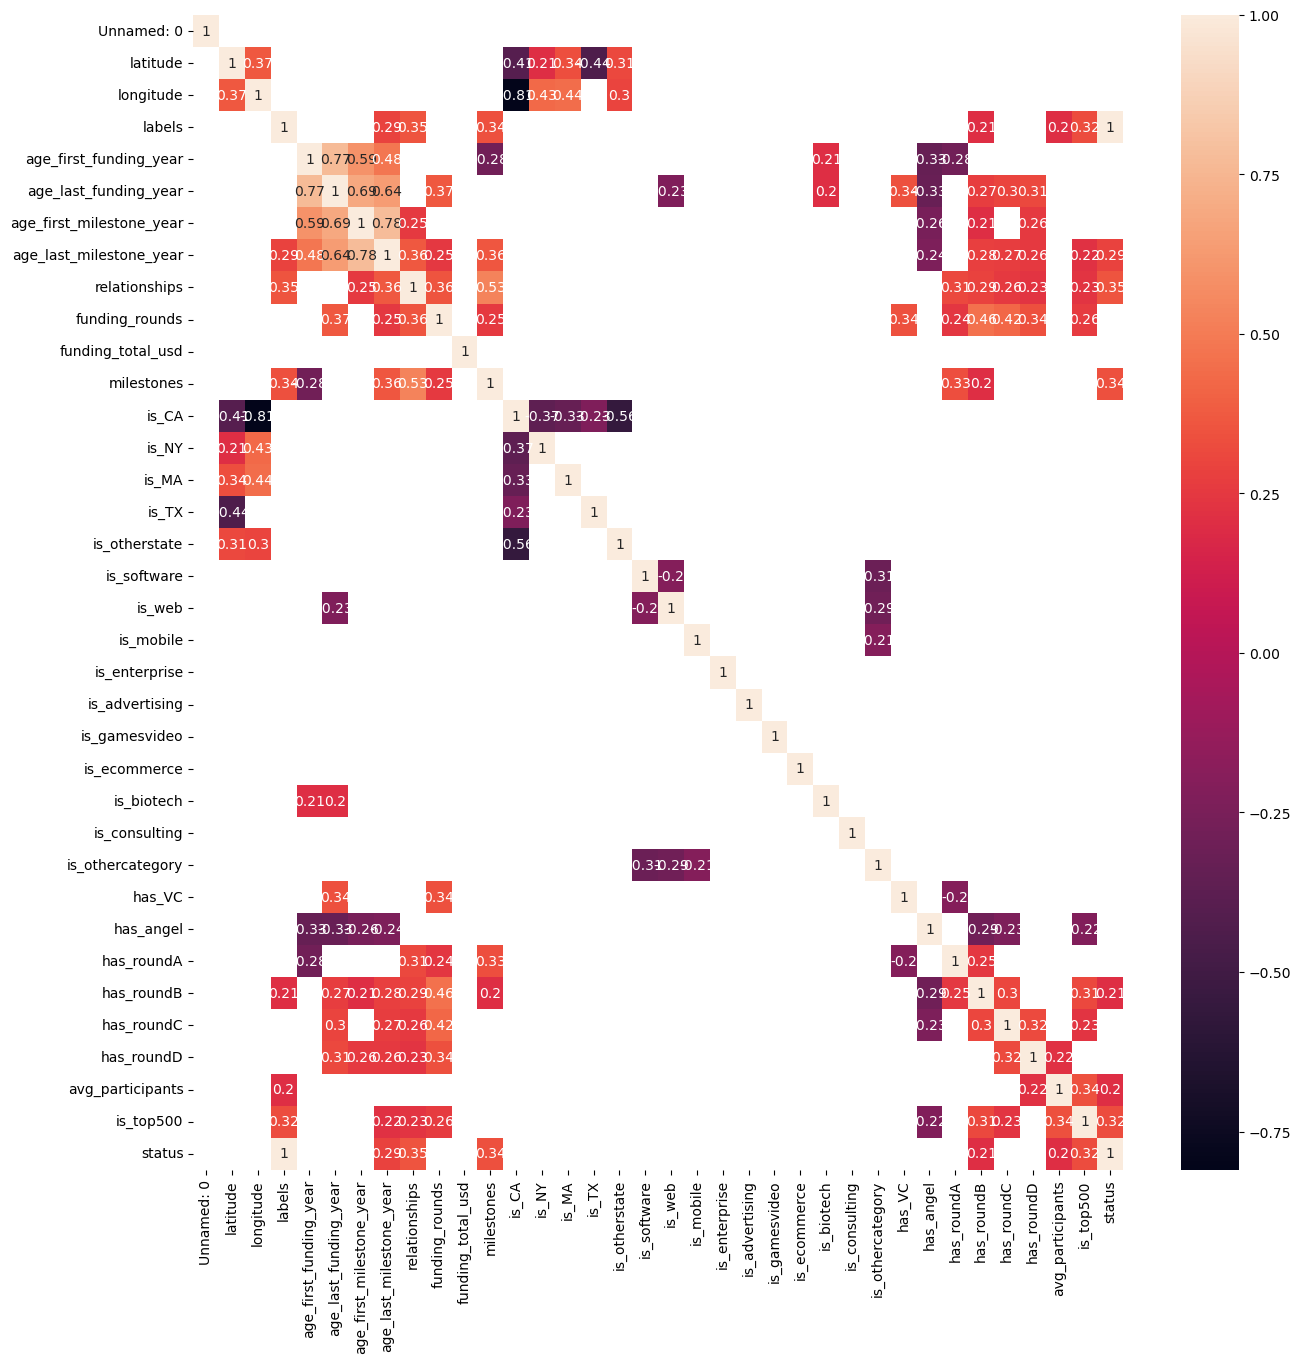

In [17]:
# Checking for correlations between the numeric columns:
corr = num_df.corr()
high_corr = corr[abs(corr)>0.2]
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, annot = True)

In [17]:
# From the correlation heatmap we understand that we need to drop the following columns:
# Labels is highly correlated with status, will drop


In [18]:
data['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ'],
      dtype=object)

In [19]:
data['state_code'].nunique()

32

In [20]:
# We want to see the top 3 states with the most start ups
data['state_code'].value_counts().head(3)

state_code
CA    370
NY     83
MA     69
Name: count, dtype: int64

In [21]:
data['category_code'].nunique()

35

In [22]:
data['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [23]:
data['category_code'].value_counts().head(10)

category_code
software           127
web                117
mobile              64
enterprise          57
advertising         50
games_video         39
network_hosting     28
biotech             27
semiconductor       21
hardware            21
Name: count, dtype: int64

In [24]:
# We only want the top 3 states, so we are moving the Texas start ups in the otherstate column 
data['is_otherstate'] = data['is_otherstate'] + data['is_TX']

In [25]:
# Columns too look into more   'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', : probably to make them dates
# Columns for OHE 'category_code'

In [25]:
# OHE in category_code column, then I will also drop the 

OHE_col = ['category_code']
data = pd.get_dummies(data,columns = OHE_col)
data.replace(to_replace = [True, False],value = [1,0], inplace = True)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Expanding the 4 columns into years and months 
data['founded_at']=pd.to_datetime(data['founded_at'])
data['funded_year']=data['founded_at'].dt.year
#data['funded_month']=data['founded_at'].dt.month
data['funded_year'].info()

data['closed_at']=pd.to_datetime(data['closed_at'])
data['closure_year']=data['closed_at'].dt.year
#data['closure_month']=data['closed_at'].dt.month
data['closure_year'].info()

data['first_funding_at']=pd.to_datetime(data['first_funding_at'])
data['first_funded_year']=data['first_funding_at'].dt.year
#data['first_funded_month']=data['first_funding_at'].dt.month

data['last_funding_at']=pd.to_datetime(data['last_funding_at'])
data['last_funded_year']=data['last_funding_at'].dt.year
#data['last_funded_month']=data['last_funding_at'].dt.month

<class 'pandas.core.series.Series'>
RangeIndex: 723 entries, 0 to 722
Series name: funded_year
Non-Null Count  Dtype
--------------  -----
723 non-null    int32
dtypes: int32(1)
memory usage: 3.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 723 entries, 0 to 722
Series name: closure_year
Non-Null Count  Dtype  
--------------  -----  
272 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [27]:
# Fill in null values on the dates with 0, as we do not have the information:

data['closure_year'] = data['closure_year'].fillna(value=0)
#data['closure_month'] = data['closure_month'].fillna(value=0)
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value=0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value=0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      723 non-null    int64         
 1   state_code                      723 non-null    object        
 2   latitude                        723 non-null    float64       
 3   longitude                       723 non-null    float64       
 4   zip_code                        723 non-null    object        
 5   id                              723 non-null    object        
 6   city                            723 non-null    object        
 7   Unnamed: 6                      338 non-null    object        
 8   name                            723 non-null    object        
 9   labels                          723 non-null    int64         
 10  founded_at                      723 non-null    datetime64[ns]
 11  closed

In [29]:
data.isnull().sum()

Unnamed: 0                          0
state_code                          0
latitude                            0
longitude                           0
zip_code                            0
id                                  0
city                                0
Unnamed: 6                        385
name                                0
labels                              0
founded_at                          0
closed_at                         451
first_funding_at                    0
last_funding_at                     0
age_first_funding_year              0
age_last_funding_year               0
age_first_milestone_year            0
age_last_milestone_year             0
relationships                       0
funding_rounds                      0
funding_total_usd                   0
milestones                          0
state_code.1                        1
is_CA                               0
is_NY                               0
is_MA                               0
is_TX       

In [30]:
data.isnull().sum().sum()

837

In [31]:
# Drop columns with no useful/important information and highly correlated columns

data.drop(['Unnamed: 0', 'Unnamed: 6' , 'zip_code', 'state_code', 'state_code.1', 'name', 'labels', 'is_TX', 'id', 'city', 'object_id', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'] , axis =1, inplace = True)

In [32]:
data.shape

(723, 72)

In [33]:
data.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [34]:
# Checking for any remaining null values:

data.isnull().sum().sum()

0

<Axes: >

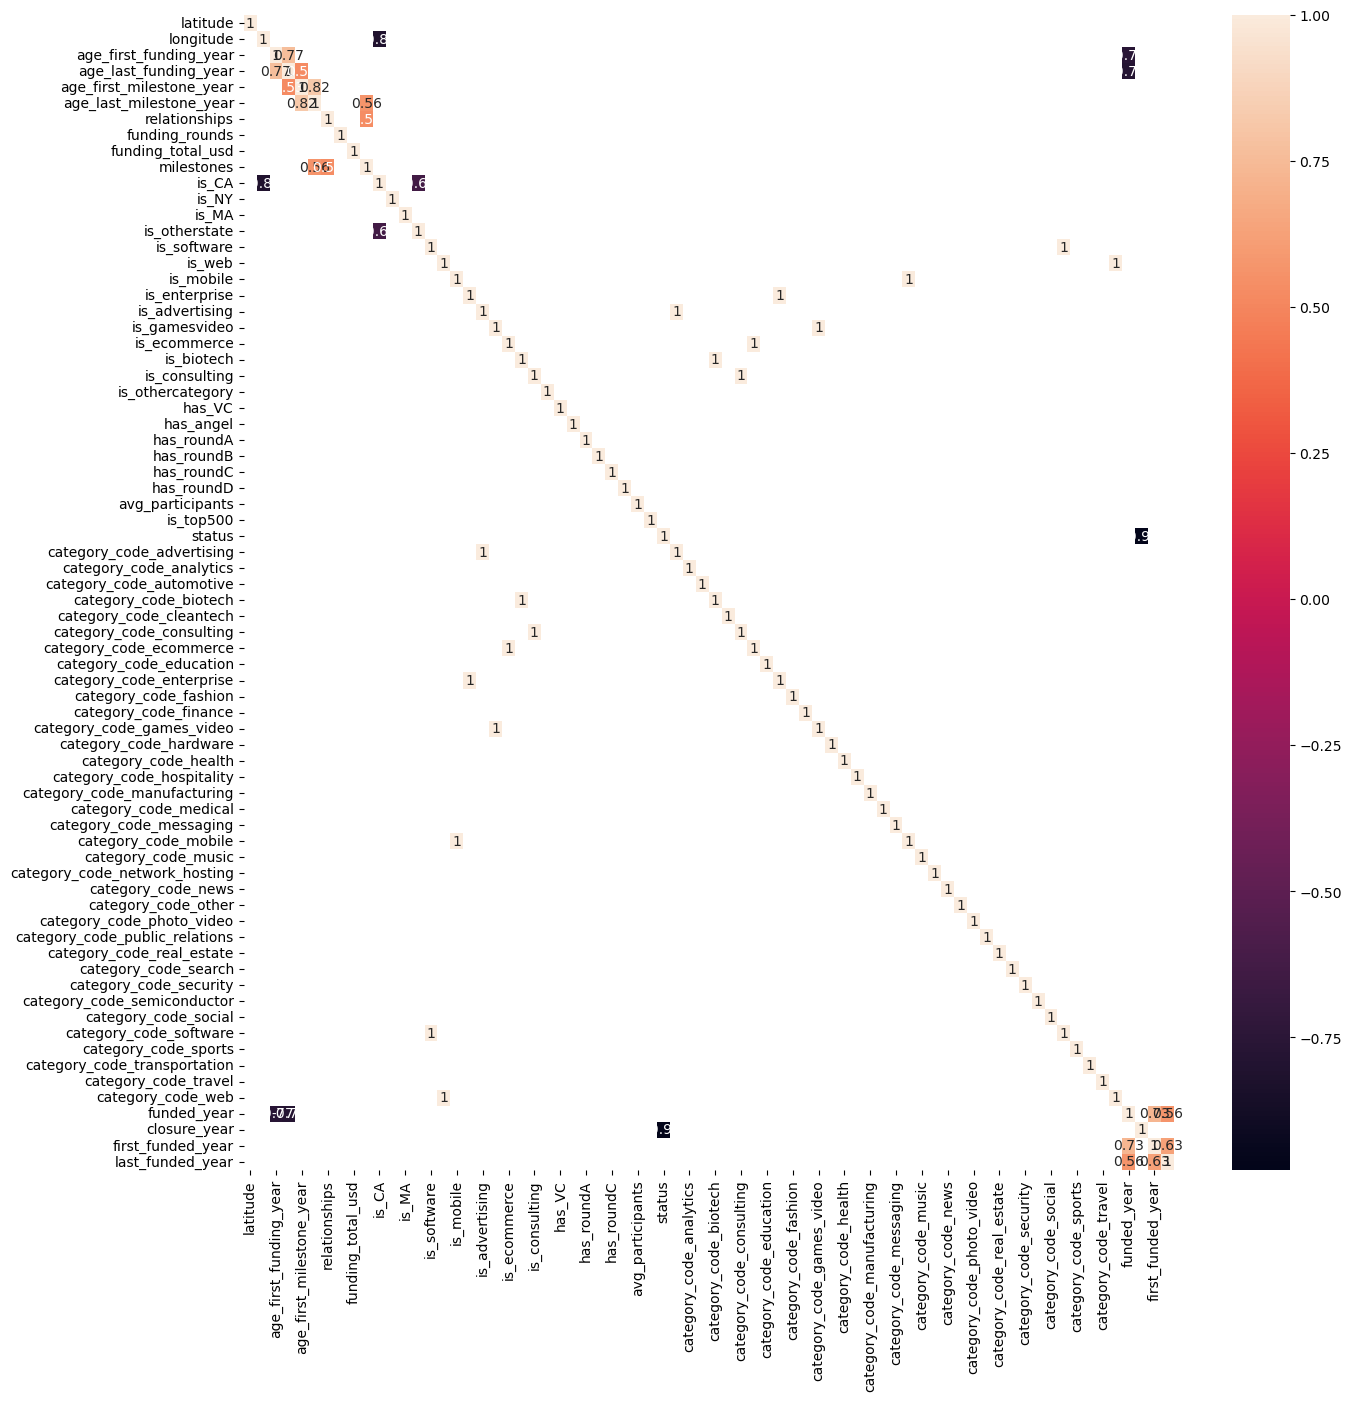

In [35]:
# create a heatmap to see the correlations >0.5 between the columns
corr = data.corr()
high_corr = corr[abs(corr)>0.5]
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, annot = True)

In [36]:
data['status'].value_counts() # 1 = acquired, 0 = closed

status
1    459
0    264
Name: count, dtype: int64

In [37]:
acquired_df = pd.DataFrame(data[data['status'] == 1]) # 1 = acquired
acquired_df .head(1)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.35888,-71.05682,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010


In [38]:
print(acquired_df['closure_year'].unique()) # where the company was acquired, the closure year is 0

[   0. 2001. 2011. 2009. 2013. 2012. 2008. 2010.]


In [39]:
print(acquired_df['closure_year'].nunique()) 

8


In [40]:
print(acquired_df['closure_year'].value_counts())# where the company was acquired, the closure year is 0

closure_year
0.0       451
2011.0      2
2001.0      1
2009.0      1
2013.0      1
2012.0      1
2008.0      1
2010.0      1
Name: count, dtype: int64


In [41]:
df = data.copy()

# MODEL

### Model using Random Forest with class_weight='balanced' to deal with imbalanced dataset,scaler, all features included

In [42]:
# Splitting the data into X and y
X = df.drop('status' , axis = 1)
y = df['status']

In [43]:
X.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Step 1: Scale the data using RobustScaler because it is robust to outliers and I have not removed them yet 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Instantiate RandomForestClassifier
classifier1 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the classifier on the training data
classifier1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred1 = classifier1.predict(X_test_scaled)

# Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred1)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred1)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred1))



Test Set Metrics:
F1 Score (Test): 0.994535519125683
Balanced Accuracy (Test): 0.9945652173913043
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.99      0.99        92

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



check for overfitting

In [47]:
# Initialize and fit RandomForestClassifier
classifier1 = RandomForestClassifier(class_weight='balanced', random_state=42)
classifier1.fit(X_train_scaled, y_train)

# Predictions on training and test sets
y_pred_train1 = classifier1.predict(X_train_scaled)

# Metrics on training set
f1_train = f1_score(y_train, y_pred_train1)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train1)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train1))

# Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training: {}, Test: {}".format(f1_train, f1_test))
print("Balanced Accuracy - Training: {}, Test: {}".format(balanced_accuracy_train, balanced_accuracy_test))

Training Set Metrics:
F1 Score (Training): 1.0
Balanced Accuracy (Training): 1.0
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       367

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578


Comparison of Training and Test Data Metrics:
F1 Score - Training: 1.0, Test: 0.994535519125683
Balanced Accuracy - Training: 1.0, Test: 0.9945652173913043


we are dealing with overfitting

### Model using Random Forest with class_weight='balanced' to deal with imbalanced dataset,scaler, feature selection kbest, k=15, hyperparameter tuning

In [48]:
X = df.drop('status' , axis = 1)
y = df['status']

In [49]:
X.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [50]:
# Step 1: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 2: Instantiate RandomForestClassifier with balanced class weights and tune hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Limit tree depth to avoid overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

classifier2 = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(classifier2, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 3: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test_selected)

# Step 4: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred2)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred2)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred2))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation F1 Score: 0.9871151975070711

Test Set Metrics:
F1 Score (Test): 0.994535519125683
Balanced Accuracy (Test): 0.9945652173913043
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.99      0.99        92

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



check for overfitting

In [51]:
# Assuming X and y are your data and target variables, and you've already split and scaled them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Initialize RandomForestClassifier
classifier2 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 2: Fit the classifier on the training data
classifier2.fit(X_train_scaled, y_train)

# Step 3: Predictions on training set
y_pred_train2 = classifier2.predict(X_train_scaled)

# Step 4: Metrics on training set
f1_train = f1_score(y_train, y_pred_train2)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train2)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train2))

# Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training: {}, Test: {}".format(f1_train, f1_test))
print("Balanced Accuracy - Training: {}, Test: {}".format(balanced_accuracy_train, balanced_accuracy_test))

Training Set Metrics:
F1 Score (Training): 1.0
Balanced Accuracy (Training): 1.0
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       367

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578


Comparison of Training and Test Data Metrics:
F1 Score - Training: 1.0, Test: 0.994535519125683
Balanced Accuracy - Training: 1.0, Test: 0.9945652173913043


we are dealing with overfitting again

-------------------------------------------------------------------------------------------
# Droping also closure year from X to check again the scores 

In [52]:
X = df.drop(['status', 'closure_year'], axis = 1)
y = df['status']

In [53]:

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data using RobustScaler (optional)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Instantiate RandomForestClassifier with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 5: Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20]  # Limit tree depth to avoid overfitting
}

# Step 6: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 7: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

# Step 8: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Cross-validation F1 Score: 0.7230429739827055

Test Set Metrics:
F1 Score (Test): 0.8677248677248677
Balanced Accuracy (Test): 0.8041427399507792
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.72      0.75        53
           1       0.85      0.89      0.87        92

    accuracy                           0.83       145
   macro avg       0.82      0.80      0.81       145
weighted avg       0.83      0.83      0.83       145



This looks better so I will proceed as follows>

New dataframe creation: We clearly can see that closure_year columns created overfitting on our data so we will create a new dataframe without this column and we will continue working with this as base going forward.

In [54]:
data_clean = df.copy()

In [55]:
data_clean.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_cod

In [56]:
data_clean.drop('closure_year', axis =1, inplace = True)

In [57]:
data_clean.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_cod

In [58]:
df2 = data_clean.copy()

In [59]:
X = df2.drop('status', axis = 1)
y = df2['status']

In [60]:
y.value_counts()

status
1    459
0    264
Name: count, dtype: int64

### Model using Random Forest with class_weight='balanced' to deal with imbalanced dataset,scaler, feature selection kbest, k=15, hyperparameter tuning ON THE NEW DATAFRAME

In [61]:

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data using RobustScaler (optional)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Instantiate RandomForestClassifier with balanced class weights
classifier3 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 5: Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20]  # Limit tree depth to avoid overfitting
}

# Step 6: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(classifier3, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 7: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(X_test_selected)

# Step 8: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred3)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred3)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred3))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Cross-validation F1 Score: 0.7230429739827055

Test Set Metrics:
F1 Score (Test): 0.8677248677248677
Balanced Accuracy (Test): 0.8041427399507792
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.72      0.75        53
           1       0.85      0.89      0.87        92

    accuracy                           0.83       145
   macro avg       0.82      0.80      0.81       145
weighted avg       0.83      0.83      0.83       145



check for overfitting

In [63]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Initialize RandomForestClassifier
classifier3 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 2: Fit the classifier on the training data
classifier3.fit(X_train_scaled, y_train)

# Step 3: Predictions on training set
y_pred_train3 = classifier3.predict(X_train_scaled)

# Step 4: Metrics on training set
f1_train = f1_score(y_train, y_pred_train3)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train3)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train3))

# Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training: {}, Test: {}".format(f1_train, f1_test))
print("Balanced Accuracy - Training: {}, Test: {}".format(balanced_accuracy_train, balanced_accuracy_test))


Training Set Metrics:
F1 Score (Training): 1.0
Balanced Accuracy (Training): 1.0
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       367

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578


Comparison of Training and Test Data Metrics:
F1 Score - Training: 1.0, Test: 0.8677248677248677
Balanced Accuracy - Training: 1.0, Test: 0.8041427399507792


still dealing with overfitting

### Model with Gradient boosting, feature selectio kbest k=15, downsampling and hyperparameter tuning

In [64]:

from imblearn.under_sampling import RandomUnderSampler

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Step 2: Scale the data using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Downsample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

# Step 5: Instantiate GradientBoostingClassifier
classifier6 = GradientBoostingClassifier(random_state=42)

# Step 6: Define parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each tree
}

# Step 7: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(classifier6, param_grid, cv=5, scoring='f1_macro', verbose=1) #cv =5 is the number of folds in the cross-validation process to find the best parameters for the model 
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 8: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred6 = best_model.predict(X_test_selected)

# Step 9: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred6)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred6)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred6))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Cross-validation F1 Score: 0.7488549943872798

Test Set Metrics:
F1 Score (Test): 0.8045977011494253
Balanced Accuracy (Test): 0.7672272354388844
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.65      0.77      0.71        53
           1       0.85      0.76      0.80        92

    accuracy                           0.77       145
   macro avg       0.75      0.77      0.76       145
weighted avg       0.78      0.77      0.77       145



CHECK FOR OVERFITTING

In [65]:

# Step 1: Initialize GradientBoostingClassifier
classifier6 = GradientBoostingClassifier(random_state=42)

# Step 2: Fit the classifier on the training data
classifier6.fit(X_train_scaled, y_train)

# Step 3: Predictions on training set
y_pred_train6 = classifier6.predict(X_train_scaled)

# Step 4: Metrics on training set
f1_train = f1_score(y_train, y_pred_train6)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train6)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train6))

# Step 5: Predictions on test set
y_pred_test = classifier6.predict(X_test_scaled)

# Step 6: Metrics on test set
f1_test = f1_score(y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))

# Step 7: Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training:", f1_train)
print("F1 Score - Test:", f1_test)
print("Balanced Accuracy - Training:", balanced_accuracy_train)
print("Balanced Accuracy - Test:", balanced_accuracy_test)



Training Set Metrics:
F1 Score (Training): 0.952755905511811
Balanced Accuracy (Training): 0.9187210248330901
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       211
           1       0.92      0.99      0.95       367

    accuracy                           0.94       578
   macro avg       0.95      0.92      0.93       578
weighted avg       0.94      0.94      0.94       578


Test Set Metrics:
F1 Score (Test): 0.9021739130434783
Balanced Accuracy (Test): 0.8661812961443807
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        53
           1       0.90      0.90      0.90        92

    accuracy                           0.88       145
   macro avg       0.87      0.87      0.87       145
weighted avg       0.88      0.88      0.88       145


Comparison of Training and Test Data Metrics:
F1 Score - Training: 0.

These results indicate that there might be some degree of overfitting, though it's not excessively bad.

### Model with Gradient boosting, feature selectio kbest k=10, downsampling and hyperparameter tuning

In [66]:

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=10
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Downsample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

# Step 5: Instantiate GradientBoostingClassifier
classifier7 = GradientBoostingClassifier(random_state=42)

# Step 6: Define parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each tree
}

# Step 7: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(classifier7, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 8: Predict on the training set with the best model to check for overfitting
best_model = grid_search.best_estimator_
y_pred_train7 = best_model.predict(X_train_resampled)

# Step 9: Calculate metrics on the training set
f1_train = f1_score(y_train_resampled, y_pred_train7)
balanced_accuracy_train = balanced_accuracy_score(y_train_resampled, y_pred_train7)

print("\nTraining Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train_resampled, y_pred_train7))

# Step 10: Predict on the test set with the best model
y_pred_test7 = best_model.predict(X_test_selected)

# Step 11: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test7)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test7))

# Step 7: Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training:", f1_train)
print("F1 Score - Test:", f1_test)
print("Balanced Accuracy - Training:", balanced_accuracy_train)
print("Balanced Accuracy - Test:", balanced_accuracy_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation F1 Score: 0.732647205612105

Training Set Metrics:
F1 Score (Training): 0.8292682926829268
Balanced Accuracy (Training): 0.8175355450236967
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       211
           1       0.78      0.89      0.83       211

    accuracy                           0.82       422
   macro avg       0.82      0.82      0.82       422
weighted avg       0.82      0.82      0.82       422


Test Set Metrics:
F1 Score (Test): 0.9021739130434783
Balanced Accuracy (Test): 0.8049630844954881
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        53
           1       0.90      0.76      0.82        92

    accuracy                           0.

These metrics suggest that the model is performing slightly better on the training set compared to the test set, but the difference is not excessively large.Classifier 6 shows higher training metrics but a larger drop-off to the test set, suggesting potential overfitting, thought not too bad. Classifier 7 is preferable if generalization to new, unseen data is more critical.

CONCLUSION

Difference in Metrics (Test - Training):
F1 Score Difference: -0.0408134185563653
Balanced Accuracy Difference: -0.08857040670345385

Negative values indicate that the test set performance is lower than the training set, which is typical and not necessarily a sign of overfitting unless the difference is significant

These differences are not extremely large, suggesting that while there is some drop-off from training to test, it's within a reasonable range. This indicates that the model is not heavily overfitting and is generalizing reasonably well to unseen data.

### print k=10 best features down here that play a role in the model for the prediction of the status of the start up

In [ ]:

# Step 3: Feature Selection using SelectKBest with k=10
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the original feature names or columns
feature_names = X.columns

# Print the names of the selected features
print("Selected Features:")
for feature_idx in selected_feature_indices:
    print(feature_names[feature_idx])

# Step 4: Fit GradientBoostingClassifier on selected features
classifier = GradientBoostingClassifier(random_state=42)
classifier.fit(X_train_selected, y_train)

# Step 5: Print feature importances (coefficients)
print("\nFeature Importances:")
feature_importances = classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]  # Get indices sorted by importance descending

for idx in sorted_indices:
    print(f"{feature_names[selected_feature_indices[idx]]}: {feature_importances[idx]}")




Selected Features:
age_first_milestone_year
age_last_milestone_year
relationships
funding_rounds
milestones
is_otherstate
has_roundA
has_roundB
avg_participants
is_top500

Feature Importances:
age_last_milestone_year: 0.48749073068988996
relationships: 0.16612173909936126
age_first_milestone_year: 0.09618178632381633
avg_participants: 0.08258893208275635
funding_rounds: 0.06786860884734973
is_top500: 0.04568702179273537
milestones: 0.026245002448756653
has_roundB: 0.01482622232944501
is_otherstate: 0.011112409510522437
has_roundA: 0.0018775468753669082


age_last_milestone_year (0.4875): The time since the last significant milestone is the most important feature. This suggests that a company's ability to achieve recent significant milestones is critical for its survival.

relationships (0.1661): The number and quality of relationships (possibly with investors, partners, or customers) is the second most important feature. Strong relationships can provide support, resources, and opportunities, which are vital for a startup's success.

age_first_milestone_year (0.0962): The time since the first significant milestone also plays a significant role. This indicates that the initial success and milestones are important for the long-term survival of the company.

avg_participants (0.0826): The average number of participants (possibly in funding rounds or events) is another relevant factor. Higher participation might indicate greater interest and support from the community or investors.

funding_rounds (0.0679): The number of funding rounds the company has gone through is also important. This could reflect the company's ability to secure continuous financial support, which is crucial for growth and survival.

is_top500 (0.0457): Being in the top 500 startups (by some measure) adds value, possibly indicating a higher reputation or better performance compared to peers.

milestones (0.0262): The total number of milestones achieved by the company contributes to its likelihood of survival, though it's less important than the timing of these milestones.

has_roundB (0.0148): Having reached a Round B of funding is a positive indicator, though its importance is relatively lower.

is_otherstate (0.0111): Whether the company is in another state (perhaps outside a major startup hub) has a small impact on survival, potentially indicating the importance of location.

has_roundA (0.0019): Reaching a Round A of funding has the least importance among the listed features, but still contributes to the overall prediction.

These feature importances show that recent successes and milestones, along with strong relationships and continuous funding, are key factors for the survival of a startup.